### Mini project: MNIST sample로 얕은 인공신경망을 만들어 봅시다.
- 랜덤하게 하나의 샘플을 뽑아 iteration

In [31]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
SCALE_FACTOR = 255
WIDTH = X_train.shape[1]
HEIGHT = X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],WIDTH*HEIGHT) / SCALE_FACTOR
X_test = X_test.reshape(X_test.shape[0],WIDTH*HEIGHT)  / SCALE_FACTOR

In [32]:
print(f"X_train.shape: {X_train.shape}, Y_train.shape: {Y_train.shape}")

X_train.shape: (60000, 784), Y_train.shape: (60000,)


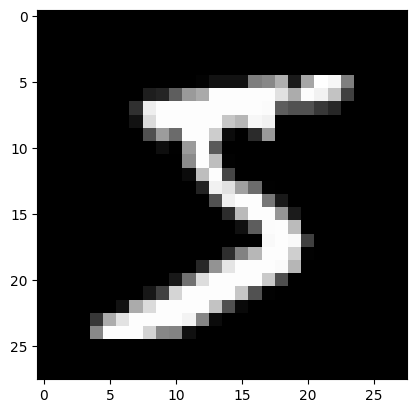

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]


In [33]:
input = X_train[0].reshape(WIDTH*HEIGHT, 1)
true = Y_train[0]
true = np.array([1 if i == true else 0 for i in range(10)]).reshape(10, 1)

plt.imshow(input.reshape(WIDTH,HEIGHT), cmap='gray')
plt.show()
print(true)

In [34]:
weights = np.random.rand(10, WIDTH*HEIGHT) - 0.5
print(weights.shape)
print(input.shape)

(10, 784)
(784, 1)


In [35]:
alpha = 0.01
pred = np.dot(weights, input)
print(f"Prediction_previous: \n {pred}")

Prediction_previous: 
 [[-1.48668642]
 [ 2.59876868]
 [ 2.77694856]
 [ 3.08174998]
 [ 1.93977258]
 [-1.76453864]
 [ 3.20354772]
 [ 3.61364671]
 [ 5.13182107]
 [ 6.7760744 ]]


In [36]:
error = (pred - true) ** 2
delta = pred - true
weight_deltas = np.outer(delta, input)

In [37]:
print(f"Prediction_previous: \n {pred.round(3)}")

for iter in range(100):
    error = (pred - true) ** 2
    delta = pred - true
    
    weight_deltas = np.outer(delta, input)
    weights -= alpha * weight_deltas

    # print(f"Weights: \n {weights}")
    # print(f"Weight_Deltas: {weight_delta}")

    pred = np.dot(weights, input)
    print(f"Iteration: {iter}, Prediction_current: \n {pred.round(3)}")

Prediction_previous: 
 [[-1.487]
 [ 2.599]
 [ 2.777]
 [ 3.082]
 [ 1.94 ]
 [-1.765]
 [ 3.204]
 [ 3.614]
 [ 5.132]
 [ 6.776]]
Iteration: 0, Prediction_current: 
 [[-0.129]
 [ 0.225]
 [ 0.24 ]
 [ 0.267]
 [ 0.168]
 [ 0.761]
 [ 0.277]
 [ 0.313]
 [ 0.444]
 [ 0.586]]
Iteration: 1, Prediction_current: 
 [[-0.011]
 [ 0.019]
 [ 0.021]
 [ 0.023]
 [ 0.015]
 [ 0.979]
 [ 0.024]
 [ 0.027]
 [ 0.038]
 [ 0.051]]
Iteration: 2, Prediction_current: 
 [[-0.001]
 [ 0.002]
 [ 0.002]
 [ 0.002]
 [ 0.001]
 [ 0.998]
 [ 0.002]
 [ 0.002]
 [ 0.003]
 [ 0.004]]
Iteration: 3, Prediction_current: 
 [[-0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
Iteration: 4, Prediction_current: 
 [[-0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
Iteration: 5, Prediction_current: 
 [[-0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
Iteration: 6, Prediction_current: 
 [[-0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
Iteration: 7, Prediction_current: 
 [

### Do as much samples as you want and observe prediction
### Consider how to evaluate predictions.

In [ ]:
def check_accuracy(weights, X, Y):
    correct = 0
    for samplenum in range(X.shape[0]):
        input = X[samplenum].reshape(WIDTH*HEIGHT, 1)
        pred = np.dot(weights, input)
        pred = np.argmax(pred)
        if pred == Y[samplenum]:
            correct += 1
    return correct / X.shape[0]

In [30]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
SCALE_FACTOR = 255
WIDTH = X_train.shape[1]
HEIGHT = X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],WIDTH*HEIGHT) / SCALE_FACTOR
X_test = X_test.reshape(X_test.shape[0],WIDTH*HEIGHT)  / SCALE_FACTOR

weights = np.random.rand(10, WIDTH*HEIGHT) - 0.5
alpha = 0.01
iteration = 1000000

for iter in range(iteration):
    ind = np.random.randint(X_train.shape[0])
    input = X_train[ind].reshape(WIDTH*HEIGHT, 1)
    true = Y_train[ind]
    true = np.array([1 if i == true else 0 for i in range(10)]).reshape(10, 1)
    
    pred = np.dot(weights, input)
    error = (pred - true) ** 2
    delta = pred - true

    weight_deltas = np.outer(delta, input)
    weights -= alpha * weight_deltas

    if iter % np.round(iteration/10) == 0:
        print(f"Iteration: {iter}, \
              Accuracy for train: {check_accuracy(weights, X_train, Y_train)}")

print(f"Accuracy for test: {check_accuracy(weights, X_test, Y_test)}")

Iteration: 0,               Accuracy for train: 0.10756666666666667
Iteration: 100000,               Accuracy for train: 0.6997666666666666
Iteration: 200000,               Accuracy for train: 0.6840666666666667
Iteration: 300000,               Accuracy for train: 0.6525166666666666
Iteration: 400000,               Accuracy for train: 0.7222833333333334
Iteration: 500000,               Accuracy for train: 0.71005
Iteration: 600000,               Accuracy for train: 0.7023166666666667
Iteration: 700000,               Accuracy for train: 0.6774
Iteration: 800000,               Accuracy for train: 0.7481166666666667
Iteration: 900000,               Accuracy for train: 0.7175833333333334
Accuracy for test: 0.7285
